# DSC 10 Discussion Week 7

<img src="data/panda_tree.jpg" width="500">

#### Extra
- You can find additional help on these topics in the course [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html).
- [Here](https://ucsd-ets.github.io/dsc10-2020-fa/published/default/reference/babypandas-reference.pdf) is a pointer to that reference sheet we saw last time.

# IMPORTANT NOTES

- **All in-person discussions have been cancelled starting today**
- These discussions will NOT be replaced with online sections
    - The only discussion will be this one (Tuesday's 6pm run by Luke)
    - If this time does not work for you, please let us know ASAP
- Stay tuned for details about extra online office hours taking the place of the old in-person discussions 

# Permutation Testing

###  A/B testing through simulation
- Decide whether two random samples come from the same distribution
- Statistic : difference between means
- Null hypothesis : the two groups are sampled from the same distribution
    - *PROBLEM* : we don't know what that distribution is!
    
### Permutation tests
- We can't draw samples from a distribution like we're used to because we don't know what the distribution is!
- Instead : randomly shuffle (permute) group labels during simulation
    - Compute the "difference in means" test statistic between groups of shuffled data

### Causation
- Observation study - rejecting the null hypothesis does not establish causality 
    - Correlation ≠ causation
    - Confounding factors
- Randomized Controlled Trial (RCT)
    - A/B test in a RCT does support causality

In [35]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import otter
grader = otter.Notebook()

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
    "livereveal", {
        'width': 1500,
        'height': 700,
        "scroll": True,
})

{'width': 1500, 'height': 700, 'scroll': True}

## Life expectancy data

This data comes from the World Health Organization.  We can learn more about the meanings of the columns by looking here: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Let's travel back in time to the year 2015 and collect some data!  For the duration of this discussion, we're going to consider the following data to be our *"population"*.

Let's take a look at it.

In [36]:
# load in all the data
life_expectancy = bpd.read_csv("data/Life Expectancy Data.csv")
life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [37]:
# choose only data from 2015
recent_data = life_expectancy[life_expectancy.get("Year") == 2015]
recent_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


## Sampling from the data

From now on, the above data will be considered our population, so we will sample from this population to complete the following experiment.

First let us therefore take a sample of 50 countries from the population.

In [49]:
# grab a sample
recent_sample = recent_data.sample(50,replace=False).get(["Status","Life expectancy "])
recent_sample

,Status,Life expectancy
2345,Developed,88.0
1942,Developing,66.4
2649,Developing,71.2
1282,Developed,82.7
2714,Developing,62.3
...,...,...
834,Developing,58.2
2329,Developed,76.7
1458,Developing,74.9
1975,Developing,62.9


## Life expectancy and country status

Question : **Is life expectancy of people born in developing countries significantly shorter than that of peole born in developing countries?**

### Question 1

Set up the null and alterantive hypotheses for this experiment.

In [50]:
# NULL Hypothesis
null_h="In the population, the life expectancy of people from developed and developing countries has the same distribution" # SOLUTION NO PROMPT

# Alternative Hypothesis
alt_h="In the population, the life expectancy of people from developing countries is typically lower than that of people from developed countries" # SOLUTION NO PROMPT

### Question 2 

How many countries in each group?

In [51]:
countries_per_group = recent_sample.groupby("Status").count().get(["Life expectancy "]) # SOLUTION
countries_per_group

,Life expectancy
Status,
Developed,12
Developing,38


### Question 3

What is the average life expectancy in each group?

In [52]:
expectancy_per_group = recent_sample.groupby("Status").mean().get(["Life expectancy "]) # SOLUTION
expectancy_per_group

,Life expectancy
Status,
Developed,81.750000
Developing,69.165789


### Question 4

Visualize the distribution of life expectancy for each group in a histogram plot.

In [53]:
# create a new dataframe for each group
developed_expectancy = recent_sample[recent_sample.get("Status") == "Developed"] # SOLUTION
developing_expectancy = recent_sample[recent_sample.get("Status") != "Developed"] # SOLUTION

# check to make sure the counts match those from above
print(f"There are {developed_expectancy.shape[0]} developed countries",end='')
print(f" and {developing_expectancy.shape[0]} developing countries")

There are 12 developed countries and 38 developing countries


Text(0.5, 0, 'Life expectancy')

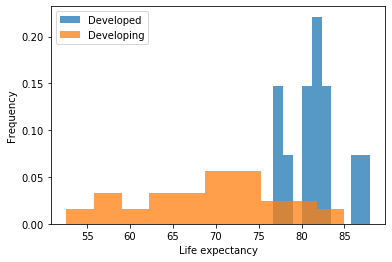

In [54]:
# plot on a histogram
fig, ax = plt.subplots()

# first plot developed 
developed_expectancy.get("Life expectancy ").plot(kind="hist", density=True, ax=ax, alpha=0.75) # SOLUTION

# then plot developing
developing_expectancy.get("Life expectancy ").plot(kind="hist", density=True, ax=ax, alpha=0.75) # SOLUTION

plt.legend(["Developed", "Developing"])
plt.xlabel("Life expectancy")

### Question 5

What test statistic should we use to compare these two sample distributions? 
Decide on which test statistic is best then compute it for the observered sample.

Hint (use ```expectancy_per_group``` from above)

In [55]:
expectancy_per_group

,Life expectancy
Status,
Developed,81.750000
Developing,69.165789


In [56]:
# observed test statistic
test_statistic_name = "difference between means" # SOLUTION

means = expectancy_per_group.get("Life expectancy ") # SOLUTION NO PROMPT
observed_test_statistic = means.loc["Developing"] - means.loc["Developed"] # SOLUTION
observed_test_statistic

-12.5842105263158

### Question 6

Randomly permute the group labels and create a new dataframe based on ```recent_sample``` with an additional column.

In [57]:
original_and_shuffled = recent_sample.assign(
    shuffled_life_expectancy = np.random.permutation(recent_sample.get("Life expectancy ")) # SOLUTION
)
original_and_shuffled

,Status,Life expectancy,shuffled_life_expectancy
2345,Developed,88.0,83.4
1942,Developing,66.4,81.1
2649,Developing,71.2,75.0
1282,Developed,82.7,74.8
2714,Developing,62.3,78.2
...,...,...,...
834,Developing,58.2,78.8
2329,Developed,76.7,57.3
1458,Developing,74.9,62.3
1975,Developing,62.9,59.6


### Question 7

Compute the mean life expectancy for each group in the newly permuted data.

What do you notice?

In [58]:
diff_between_means = original_and_shuffled.groupby("Status").mean() # SOLUTION
diff_between_means

,Life expectancy,shuffled_life_expectancy
Status,,
Developed,81.750000,72.191667
Developing,69.165789,72.184211


### Question 8

Is it not clear? Let's try taking the mean difference

In [59]:
obs_mean_difference = diff_between_means.loc['Developing'] - diff_between_means.loc['Developed'] # SOLUTION
obs_mean_difference

Life expectancy            -12.584211
shuffled_life_expectancy    -0.007456
dtype: float64

### Question 9
Wow! That's a huge difference? Could it be chance? Let's repeat this 5000 times and store the shuffled difference in an array

In [60]:
simulated_stats = np.array([]) # BEGIN SOLUTION
num_observations = 5000 # BEGIN SOLUTION

# BEGIN SOLUTION
for _ in range(num_observations):
    original_and_shuffled = recent_sample.assign(shuffled_life_expectancy = np.random.permutation(recent_sample.get("Life expectancy ")))
    diff_between_means = original_and_shuffled.groupby("Status").mean()
    mean_difference = diff_between_means.loc['Developing'] - diff_between_means.loc['Developed']
    shuffled_difference = mean_difference.get('shuffled_life_expectancy')
    simulated_stats = np.append(simulated_stats, shuffled_difference)
    
# END SOLUTION
simulated_stats
    

array([-0.0622807 , -0.5995614 , -3.91096491, ...,  0.71622807,
        1.46184211, -6.34517544])

### Question 10

Doesn't look like we can blame these differences on chance (assuming our null hypothesis is true). Let's see the likelihood of our observed difference given this result



In [69]:
p_val = (simulated_stats <= obs_mean_difference.get('Life expectancy ')).mean() # SOLUTION
p_val

0.0

### Question 11

Looks like our p value is pretty high. Should we reject the nullhypothesis with a 10% significance threshold?

In [70]:
reject_null_hypothesis = p_val < .1 # SOLUTION
reject_null_hypothesis

True

# Quick recap about sampling!

Here we'll take a look at the same life expectancy data and do some sampling exercises.

In [71]:
# Let's visualize our population distribution.

# Defining a function to create bins easily
def get_bins(array, bin_size=1):
    smallestNum = int(array.min())
    
    largestNum = int(array.max())
    upperLimit = largestNum + bin_size + 1
    
    return np.arange(smallestNum, upperLimit, bin_size)

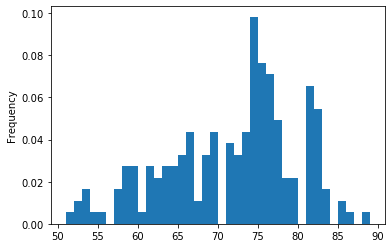

In [100]:
measured = recent_data.get("Life expectancy ")

#generate number of bins
n_bins = get_bins(measured, 1) # <-- Try playing around with the bin size

#lets plot the histogram
recent_data.get('Life expectancy ').plot(kind='hist', bins=n_bins, density=True)

In [101]:
# This is our ... ?

```
POPULATION DISTRIBUTION
```

So, what is our aim?  

We want to estimate the average life expectancy for the globe!  Let's say we don't have access to the entire population.  

Flying around the world is pretty expensive, so we can only collect data from 15 countries.

We can sample and use bootstrapping to find this.


In [102]:
# How do we create a representative sample?
collected = recent_data.sample(n=15, replace=False)


In [103]:
collected

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2425,Spain,2015,Developed,82.8,56.0,1,NaN,0.0,97.0,115,...,97.0,NaN,97.0,0.1,25683.845650,46447697.0,0.6,0.5,0.882,17.7
898,Fiji,2015,Developing,69.9,188.0,0,NaN,0.0,99.0,0,...,99.0,NaN,99.0,0.1,4921.896290,892149.0,4.0,3.7,0.734,15.3
304,Bolivia (Plurinational State of),2015,Developing,77.0,186.0,8,NaN,0.0,99.0,0,...,99.0,NaN,99.0,0.1,NaN,NaN,1.2,1.1,0.671,13.8
786,Ecuador,2015,Developing,76.2,118.0,6,NaN,0.0,78.0,0,...,84.0,NaN,78.0,0.1,625.622240,16144368.0,1.2,1.1,0.739,14.0
192,Bangladesh,2015,Developing,71.8,129.0,92,NaN,0.0,97.0,240,...,97.0,NaN,97.0,0.1,121.158120,1612886.0,17.9,18.3,0.575,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.0,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
1683,Mexico,2015,Developing,76.7,122.0,30,NaN,0.0,82.0,0,...,87.0,NaN,87.0,0.1,9143.128494,12589949.0,1.5,1.5,0.758,13.3
1910,Norway,2015,Developed,81.8,59.0,0,5.97,0.0,NaN,14,...,95.0,NaN,95.0,0.1,7455.246540,518867.0,0.8,0.7,0.948,17.7
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


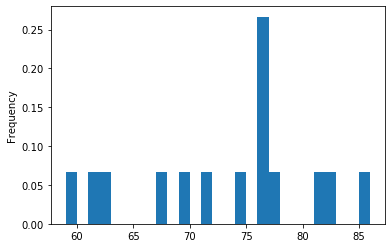

In [104]:
#we need new bin sizes
n_bins = get_bins(collected.get('Life expectancy '),1)


#lets plot the histogram
collected.get('Life expectancy ').plot(kind='hist', bins=n_bins, density=True)

In [105]:
# This is our ...?

```
SAMPLE DISTRIBUTION
```

We're interested in estimating the mean life expectancy.  So, let's find the mean of our sample.

In [106]:
sample_mean = collected.get('Life expectancy ').mean()
sample_mean

73.27333333333333

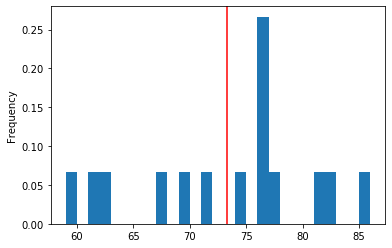

In [107]:
# We can show our mean in relation to the sample:

#plot the historgram again
collected.get('Life expectancy ').plot(kind='hist', bins=n_bins, density=True)

#draw the sample mean
plt.axvline(sample_mean, c='r')

In [108]:
# This is our ... ?

```
SAMPLE MEAN
```

What happens when we resample?

The resampled mean is:		 72.30666666666666 
Compared to the original:	 73.27333333333333


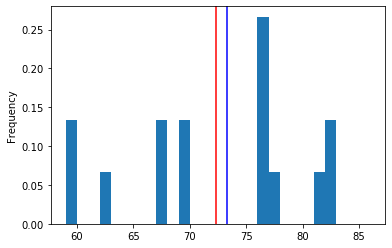

In [109]:
# Run this multiple time to see what changes.

resampled = collected.sample(15,replace=True)
resampled_mean = resampled.get('Life expectancy ').mean()
n_bins = get_bins(collected.get('Life expectancy '), 1)

print("The resampled mean is:\t\t", resampled_mean, "\nCompared to the original:\t", sample_mean)

#plot the historgram again
resampled.get('Life expectancy ').plot(kind='hist', bins=n_bins, density=True)

#lets show the sampled_mean and resampled_mean
plt.axvline(resampled_mean, c='r')
plt.axvline(sample_mean, c='b')

In [110]:
# This is our ... ?

```
RESAMPLED MEAN
```

Now, let's run the bootstrap so we can create a distribution!

(array([  0.,   1.,   0.,   3.,   7.,   6.,  27.,  47.,  64.,  89., 163.,
        217., 277., 404., 420., 504., 466., 482., 446., 416., 320., 222.,
        190., 114.,  58.,  29.,  19.,   7.,   1.,   1.]),
 array([65. , 65.5, 66. , 66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5, 70. ,
        70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5, 75. , 75.5,
        76. , 76.5, 77. , 77.5, 78. , 78.5, 79. , 79.5, 80. ]),
 <a list of 30 Patch objects>)

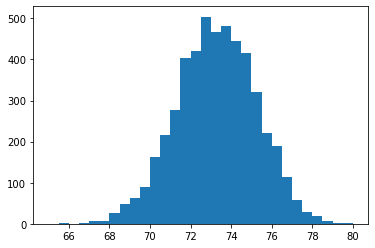

In [111]:
sample_means = np.array([])

for i in range(5000):
    bootstrapped = collected.sample(15,replace=True)
    boot_mean = bootstrapped.get('Life expectancy ').mean()
    sample_means = np.append(sample_means, boot_mean)
    

plt.hist(sample_means, bins=get_bins(sample_means, 0.5))

In [112]:
# This is our ... ?

```
DISTRIBUTION OF SAMPLE MEANS
```